In [1]:
from acados_tool.plotFcn import *
import numpy as np

def plot_traj(traj_actual, time_actual, opt):
    if (opt==1):
        plotTrackProj(traj_actual[:], opt=opt, vel=True, whole=True)
    elif (opt==2):
        plotTrackProj(traj_actual[:-3], opt=opt, vel=True, whole=True)
        
    if (opt==1):
        map_name = 'LMS_Track.txt'
    elif (opt==2):
        map_name = 'bigger_track.txt'

    step = 0
    for i in range(0, time_actual.shape[0]-1):
        step += (int)(time_actual[i][1])
        x,y,_,_ = transformProj2Orig(traj_actual[step][0],traj_actual[step][1],0,0,map_name)
        plt.plot(x,y,"go",markersize=12, alpha=.5)
        
def calc_info(traj_actual, time_actual, xl='', opt=''):
    plt.figure()

    prog_t = []
    calc_t = []
    diff_t = []
    progress = []
    iter_num = []
    step = 0
    for i in range(0, time_actual.shape[0]-1):
        step += time_actual[i][1]
        progress += [traj_actual[(int)(step)][0]]

        prog_t += [time_actual[i][2]]
        calc_t += [time_actual[i][0]]
        diff_t += [time_actual[i][2]-time_actual[i][0]]
        iter_num += [time_actual[i][3]]

    plt.plot(prog_t[1:], 'gx-', label='progress time')
    plt.plot(calc_t[1:], 'bx-', label='NMPC calculation time')
    if (xl==''):
        plt.xlabel('The triggering points of the NMPC recalculation')
    else:
        plt.xlabel(xl)
    plt.ylabel('Time [ms]')
    plt.legend()
    plt.show()

    print("prog_t max: ", max(prog_t[1:]), " - min: ", min(prog_t[1:]), " - avg: ", np.mean(prog_t[1:]))
    print("calc_t max: ", max(calc_t[1:]), " - min: ", min(calc_t[1:]), " - avg: ", np.mean(calc_t[1:]))
    print("iter_num max: ", max(iter_num[1:]), " - min: ", min(iter_num[1:]), " - avg: ", np.mean(iter_num[1:]))
    
    return prog_t, calc_t, diff_t, iter_num

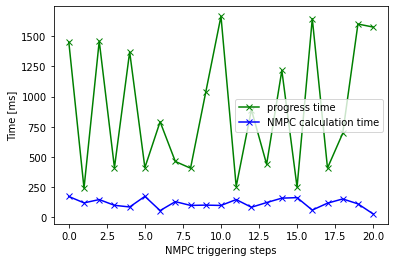

prog_t max:  1664.9872  - min:  240.51163  - avg:  889.45135
calc_t max:  172.908  - min:  27.58  - avg:  114.90982
iter_num max:  16.0  - min:  5.0  - avg:  10.666667


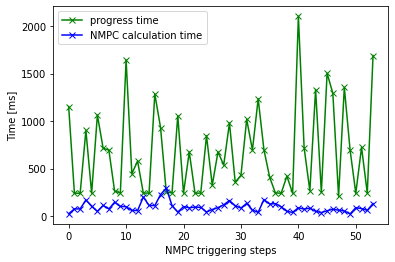

prog_t max:  2102.62  - min:  208.32431  - avg:  667.0922
calc_t max:  294.317  - min:  22.375  - avg:  94.1711
iter_num max:  17.0  - min:  4.0  - avg:  8.111111


In [56]:
traj_actual = np.loadtxt("../result/triggering/track1/N30/traj_actual.txt", usecols=range(0,), dtype=np.float32)
time_actual = np.loadtxt("../result/triggering/track1/N30/traj_time.txt", usecols=range(0,), dtype=np.float32)
prog_t, calc_t, diff_t, iter_num = calc_info(traj_actual, time_actual, "NMPC triggering steps")

traj_actual = np.loadtxt("../result/triggering/track2/N30/traj_actual.txt", usecols=range(0,), dtype=np.float32)
time_actual = np.loadtxt("../result/triggering/track2/N30/traj_time.txt", usecols=range(0,), dtype=np.float32)
prog_t, calc_t, diff_t, iter_num = calc_info(traj_actual, time_actual, "NMPC triggering steps")

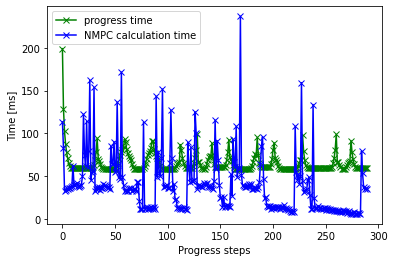

prog_t max:  198.94127  - min:  57.968166  - avg:  65.5651
calc_t max:  236.801  - min:  6.015  - avg:  38.948174
iter_num max:  20.0  - min:  1.0  - avg:  3.4275863


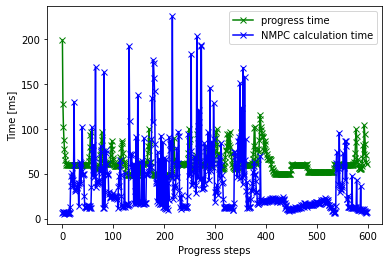

prog_t max:  198.7746  - min:  47.49244  - avg:  61.99988
calc_t max:  225.367  - min:  5.112  - avg:  36.75136
iter_num max:  20.0  - min:  1.0  - avg:  2.9983306


In [21]:
time_actual = np.loadtxt("../result/baseline/track1/N30/traj_time.txt", usecols=range(0,), dtype=np.float32)
traj_actual = np.loadtxt("../result/baseline/track1/N30/traj_actual.txt", usecols=range(0,), dtype=np.float32)
prog_t, calc_t, diff_t, iter_num = calc_info(traj_actual, time_actual, "Progress steps", "-")

time_actual = np.loadtxt("../result/baseline/track2/N30/traj_time.txt", usecols=range(0,), dtype=np.float32)
traj_actual = np.loadtxt("../result/baseline/track2/N30/traj_actual.txt", usecols=range(0,), dtype=np.float32)
prog_t, calc_t, diff_t, iter_num = calc_info(traj_actual, time_actual, "Progress steps", "-")

In [57]:
traj_actual = np.loadtxt("../result/baseline/track1/N15/traj_actual.txt", usecols=range(0,), dtype=np.float32)
print("track1 (base 15)\n lap time: ", traj_actual[-1][-1])
traj_actual = np.loadtxt("../result/baseline/track1/N30/traj_actual.txt", usecols=range(0,), dtype=np.float32)
print("track1 (base 30)\n lap time: ", traj_actual[-1][-1])
traj_actual = np.loadtxt("../result/triggering/track1/N30/traj_actual.txt", usecols=range(0,), dtype=np.float32)
print("track1 (triggering)\n lap time: ", traj_actual[-1][-1])

print()

traj_actual = np.loadtxt("../result/baseline/track2/N15/traj_actual.txt", usecols=range(0,), dtype=np.float32)
print("track2 (base 15)\n lap time: ", traj_actual[-1][-1])
traj_actual = np.loadtxt("../result/baseline/track2/N30/traj_actual.txt", usecols=range(0,), dtype=np.float32)
print("track2 (base 30)\n lap time: ", traj_actual[-1][-1])
traj_actual = np.loadtxt("../result/triggering/track2/N30/traj_actual.txt", usecols=range(0,), dtype=np.float32)
print("track2 (triggering)\n lap time: ", traj_actual[-1][-1])

track1 (base 15)
 lap time:  19.040358
track1 (base 30)
 lap time:  19.01388
track1 (triggering)
 lap time:  19.03848

track2 (base 15)
 lap time:  37.27946
track2 (base 30)
 lap time:  37.19793
track2 (triggering)
 lap time:  37.232765
